In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [24]:
# ***** CASO DE TESTE 2 - Jitter alto *****

# dados: linha 1 em data.csv | packetsTimesData\11.csv

# atraso mínimo = 50 ms
# atraso máximo = 1000 ms
# atraso de buffer = 10.000 ms (10s)
# atraso de rebuferização = 8.000 ms (8s)
# perda de pacotes

# dataFrame com intervalo de tempo entre pacotes
n = 1
filename =  "..\\packetsTimesData\\11.csv"
df = pd.read_csv(filename)
df

,packetSequenceNumber,scheduledPlayoutTimeMillis,arrivalTimeMillis
0,0,1733337609312,1733337599332
1,1,1733337609332,1733337599384
2,2,1733337609352,1733337599424
3,3,1733337609372,1733337599461
4,4,1733337609392,1733337599500
...,...,...,...
496,496,1733337854232,1733337853090
497,497,1733337854252,1733337853152
498,498,1733337854272,1733337853198
499,499,1733337854292,1733337853245


In [25]:
# dataFrame com dados da execução do teste
df2 = pd.read_csv("..\\data.csv")
df2

,minNetworkDelayMillis,maxNetworkDelayMillis,playoutBufferDelayMillis,packetConsumeTimeMillis,rebufferingDelayMillis,discartProbPercent,timeMillis,timeRebufferingMillis,numTimesRebuffer,numConsumedPackets,numLatePackets,numOutOfOrderPackets,numLostPackets
0,50,100,10000,20,8000,0,51780,24000,3,501,0,0,0
1,50,1000,10000,20,5000,0,264097,235000,47,501,0,0,0
2,50,500,5000,20,2500,0,147940,122500,49,239,262,0,0
3,50,500,5000,20,3500,20,146312,126000,36,245,137,0,119


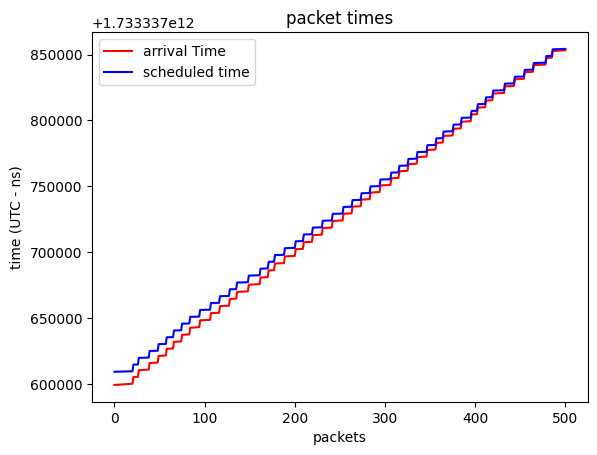

In [38]:
# Grafico comparativo de tempos
scheduled_times = list(df["scheduledPlayoutTimeMillis"])
arival_times = list(df["arrivalTimeMillis"])
x = list(range(len(arival_times)))

plt.title("packet times")
plt.plot(x, arival_times, label="arrival Time", color="red")
plt.plot(x, scheduled_times, label="scheduled time", color="blue")
plt.xlabel("packets")
plt.ylabel("time (UTC - ns)")
plt.legend()

plt.savefig("..\\figs\\case2-g1.png")
plt.show()

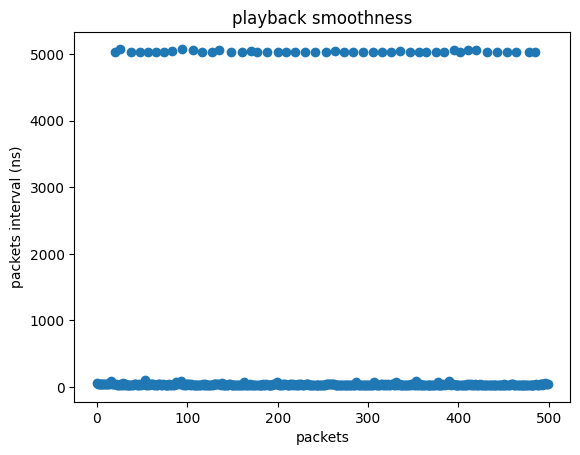

In [37]:
# Grafico de playback smoothness
playback_smoothness = [arival_times[i] - arival_times[i-1] for i in range(1, len(arival_times))]
x = [i for i in range(len(playback_smoothness))]

plt.title("playback smoothness")
plt.scatter(x, playback_smoothness)
plt.xlabel("packets")
plt.ylabel("packets interval (ns)")
plt.savefig("..\\figs\\case2-g2.png")
plt.show()

In [28]:
# dados sobre o caso de teste
cols = ["timeMillis", "timeRebufferingMillis", "numTimesRebuffer", "numConsumedPackets", "numLatePackets", "numLostPackets"]
df2.loc[n, cols]

timeMillis               264097
timeRebufferingMillis    235000
numTimesRebuffer             47
numConsumedPackets          501
numLatePackets                0
numLostPackets                0
Name: 1, dtype: int64

In [29]:
# tempo relativo rebuferizando sobre tempo total
print(f"time spent rebuferring: {df2.loc[n, "timeRebufferingMillis"] / df2.loc[n, "timeMillis"]}")

time spent rebuferring: 0.8898245720322457


In [30]:
print(f"mean = {statistics.mean(playback_smoothness):.3f} ms")
print(f"median = {statistics.median(playback_smoothness):.3f} ms")
print(f"variance = {statistics.variance(playback_smoothness):.3f} ms")
print(f"std deviation = {statistics.stdev(playback_smoothness):.3f} ms")

mean = 507.926 ms
median = 35.000 ms
variance = 2137347.123 ms
std deviation = 1461.967 ms


[501]
['Consumidos']
['#4682B4']


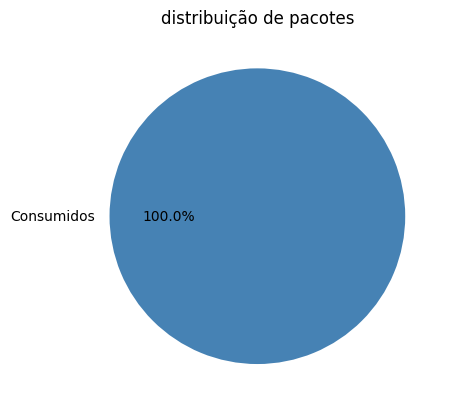

In [36]:
consumed = df2.loc[n, "numConsumedPackets"]
late = df2.loc[n, "numLatePackets"]
unordered = df2.loc[n, "numOutOfOrderPackets"]
lost = df2.loc[n, "numLostPackets"]

labels = ["Consumidos", "atrasados", "fora de ordem", "perdidos"]
colors = ['#4682B4', '#FFA07A', '#CD5C5C', '#9370DB']
sizes = [consumed, late, unordered, lost]
# explode = (0.1, 0.1, 0, 0)

r_sizes = []
r_colors = []
r_labels = []

for i, (size, label, color) in enumerate(zip(sizes, labels, colors)):
    if size != 0:
        r_sizes.append(int(size))
        r_colors.append(color)
        r_labels.append(label)
        
        
print(r_sizes)
print(r_labels)
print(r_colors)


plt.title("distribuição de pacotes")
plt.pie(r_sizes, labels=r_labels, autopct='%1.1f%%', colors=r_colors)
plt.savefig("..\\figs\\case2-g3.png")
plt.show()